In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os

In [2]:
files_to_read = os.listdir("C:\\Users\\PB\\Documents\\GithubRepos\\Generative-Models-for-CERN-Fast-Simulations\\notebooks\\gan_proton_15_2312\\sin_gan\\parameter sweep")
files_to_read

['10e-1_singan.csv',
 '10e-2_singan.csv',
 '10e-3_singan.csv',
 '10e-4_singan.csv',
 '10e-5_singan.csv',
 '10e-6_singan.csv']

In [ ]:
data = None
for file in files_to_read:
    read_file = pd.read_csv(f"C:\\Users\\PB\\Documents\\GithubRepos\\Generative-Models-for-CERN-Fast-Simulations\\notebooks\\gan_proton_15_2312\\sin_gan\\parameter sweep\\{file}")
    if data is None:
        data = read_file
    else:
        data = pd.concat([data, read_file])

### Read single file

In [2]:
data = pd.read_csv(f"C:\\Users\\PB\\Documents\\GithubRepos\\Generative-Models-for-CERN-Fast-Simulations\\notebooks\\gan_proton_15_2312\\sin_gan\\parameter sweep\\wandb_export_2023-12-31T18_20_11.820+01_00.csv")

In [3]:
data = data.set_index("Step")

In [4]:
data.head()

,1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean,1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean__MIN,1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean__MAX,1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean,1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean__MIN,1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean__MAX,1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean,1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean__MIN,1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean__MAX,1e-11_1_15_2133_31_12_2023_09_40 - ws_mean,...,15_2133_28_12_2023_21_30 - ws_mean__MAX,15_2133_28_12_2023_20_19 - ws_mean,15_2133_28_12_2023_20_19 - ws_mean__MIN,15_2133_28_12_2023_20_19 - ws_mean__MAX,15_2133_28_12_2023_20_11 - ws_mean,15_2133_28_12_2023_20_11 - ws_mean__MIN,15_2133_28_12_2023_20_11 - ws_mean__MAX,15_2133_28_12_2023_19_56 - ws_mean,15_2133_28_12_2023_19_56 - ws_mean__MIN,15_2133_28_12_2023_19_56 - ws_mean__MAX
Step,,,,,,,,,,,,,,,,,,,,,
0,1.062166e+13,1.062166e+13,1.062166e+13,3.481266e+01,3.481266e+01,3.481266e+01,1.641082e+31,1.641082e+31,1.641082e+31,31.717092,...,3.757063e+04,1.859736e+02,1.859736e+02,1.859736e+02,1.450453e+03,1.450453e+03,1.450453e+03,52.087112,52.087112,52.087112
1,NaN,NaN,NaN,8.967109e+01,8.967109e+01,8.967109e+01,5.168012e+18,5.168012e+18,5.168012e+18,21.910568,...,1.672255e+08,5.344615e+01,5.344615e+01,5.344615e+01,1.324715e+11,1.324715e+11,1.324715e+11,51.971966,51.971966,51.971966
2,NaN,NaN,NaN,2.326890e+08,2.326890e+08,2.326890e+08,4.747622e+15,4.747622e+15,4.747622e+15,25.820441,...,5.134764e+01,1.728826e+07,1.728826e+07,1.728826e+07,3.331077e+12,3.331077e+12,3.331077e+12,51.636879,51.636879,51.636879
3,2.205047e+15,2.205047e+15,2.205047e+15,4.699128e+01,4.699128e+01,4.699128e+01,2.132886e+13,2.132886e+13,2.132886e+13,24.469554,...,5.059560e+01,5.194145e+02,5.194145e+02,5.194145e+02,4.623154e+01,4.623154e+01,4.623154e+01,51.486899,51.486899,51.486899
4,2.233257e+14,2.233257e+14,2.233257e+14,3.009109e+01,3.009109e+01,3.009109e+01,6.102289e+18,6.102289e+18,6.102289e+18,31.429282,...,5.001723e+01,5.043707e+01,5.043707e+01,5.043707e+01,5.118269e+01,5.118269e+01,5.118269e+01,50.627261,50.627261,50.627261


In [5]:
# select only columns with means
regex_pattern = re.compile(r'.* - ws_mean$')
run_names = [column for column in list(data.columns) if regex_pattern.match(column)]

In [6]:
intensity_values = [text.split("_")[0] for text in run_names]
diversity_values = [text.split("_")[1] for text in run_names]

In [7]:
embedded_dict = {}

for run_name, intensity, diversity in zip(run_names, intensity_values, diversity_values):

    # If diversity is not a key in the outer dictionary, add it
    if diversity not in embedded_dict:
        embedded_dict[diversity] = {}

    # If intensity is not a key in the inner dictionary, add it with an empty list
    if intensity not in embedded_dict[diversity]:
        embedded_dict[diversity][intensity] = []

    # Append the run_name to the list
    embedded_dict[diversity][intensity].append(run_name)

In [8]:
embedded_dict

{'0.01': {'1e-11': ['1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean',
   '1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean',
   '1e-11_0.01_15_2133_31_12_2023_08_56 - ws_mean'],
  '1e-08': ['1e-08_0.01_15_2133_29_12_2023_12_37 - ws_mean',
   '1e-08_0.01_15_2133_29_12_2023_11_02 - ws_mean',
   '1e-08_0.01_15_2133_29_12_2023_09_29 - ws_mean',
   '1e-08_0.01_15_2133_28_12_2023_23_32 - ws_mean'],
  '1e-09': ['1e-09_0.01_15_2133_29_12_2023_07_55 - ws_mean',
   '1e-09_0.01_15_2133_29_12_2023_06_22 - ws_mean',
   '1e-09_0.01_15_2133_29_12_2023_04_46 - ws_mean'],
  '1e-10': ['1e-10_0.01_15_2133_29_12_2023_03_13 - ws_mean',
   '1e-10_0.01_15_2133_29_12_2023_01_38 - ws_mean',
   '1e-10_0.01_15_2133_29_12_2023_00_06 - ws_mean']},
 '0.1': {'1e-11': ['1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean',
   '1e-11_0.1_15_2133_31_12_2023_09_33 - ws_mean',
   '1e-11_0.1_15_2133_31_12_2023_07_57 - ws_mean'],
  '1e-09': ['1e-09_0.1_15_2133_30_12_2023_05_53 - ws_mean',
   '1e-09_0.1_15_2133_30_12_2023_04_19 - ws_m

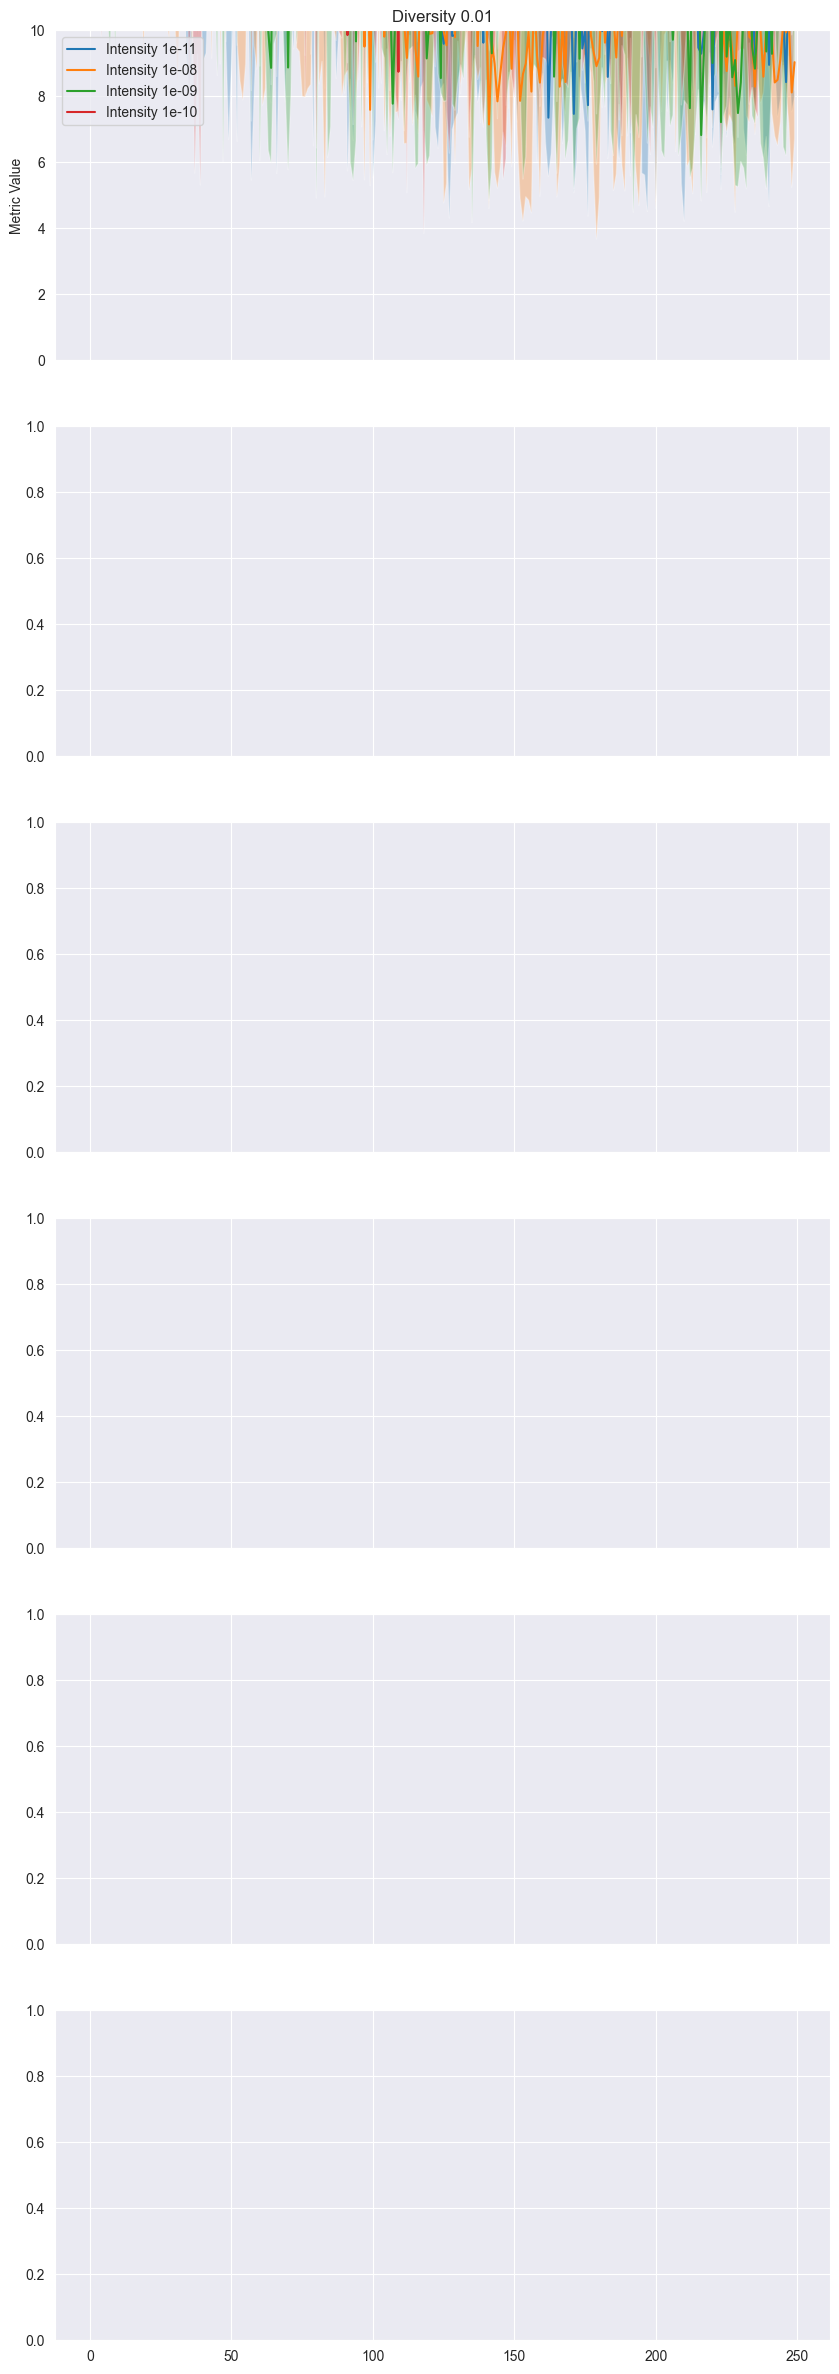

In [9]:
N_EACH = 1

# Create a figure with 6 subplots (6 rows, 1 column)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30), sharex=True)

# Iterate over each diversity value
for i, diversity_value in enumerate(embedded_dict):
    # select data from diversity value
    intensity_dict = embedded_dict[diversity_value]
    # Extract unique intensity values for ordering
    unique_intensities = intensity_dict.keys()

    # Plot each intensity value on the current subplot
    for intensity_value in unique_intensities:
        run_names = intensity_dict[intensity_value]

        # data_temp = data[run_names].values[::N_EACH]
        mean_values = data[run_names].mean(axis=1)
        min_values = data[run_names].min(axis=1)
        max_values = data[run_names].max(axis=1)

        # Plot the line
        sns.lineplot(x=data.index[::N_EACH], y=mean_values, label=f'Intensity {intensity_value}', ax=axes[i])
        axes[i].fill_between(data.index[::N_EACH], min_values, max_values, alpha=0.3)

    # Set subplot title
    axes[i].set_title(f'Diversity {diversity_value}')

    # Add legend
    axes[i].legend()
    axes[i].set_xlabel('Step')
    axes[i].set_ylabel('Metric Value')
    axes[i].set_ylim([0, 10])
    break
# Set common x-axis label
#plt.xlabel('Run Names')

# Adjust layout to prevent clipping of the titles
#plt.tight_layout()

# Show the plot
#plt.show()

### Just analyze the results (min_ws) value without plotting

In [9]:
data = data.astype(float)

In [10]:
min_indices = data.idxmin()

In [11]:
WS_RUNS = {}
for column, index in min_indices.iteritems():
    print(f"Column: {column}, Minimal Value: {data[column].min()}, at step: {index}")
    WS_RUNS[data[column].min()] = column

Column: 1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean, Minimal Value: 4.216291926828947, at step: 210
Column: 1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean__MIN, Minimal Value: 4.216291926828947, at step: 210
Column: 1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean__MAX, Minimal Value: 4.216291926828947, at step: 210
Column: 1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean, Minimal Value: 6.476677838612983, at step: 107
Column: 1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean__MIN, Minimal Value: 6.476677838612983, at step: 107
Column: 1e-11_0.1_15_2133_31_12_2023_11_08 - ws_mean__MAX, Minimal Value: 6.476677838612983, at step: 107
Column: 1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean, Minimal Value: 5.177728477565827, at step: 223
Column: 1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean__MIN, Minimal Value: 5.177728477565827, at step: 223
Column: 1e-11_0.01_15_2133_31_12_2023_10_28 - ws_mean__MAX, Minimal Value: 5.177728477565827, at step: 223
Column: 1e-11_1_15_2133_31_12_2023_09_40 - ws_mean, Min

C:\Users\PB\AppData\Local\Temp\ipykernel_40940\1737770433.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, index in min_indices.iteritems():


In [12]:
sorted(WS_RUNS.items(), key=lambda x: x[0])

[(3.0915188887749894, '1e-10_0.1_15_2133_29_12_2023_22_03 - ws_mean__MAX'),
 (3.675624917615282, '1e-08_0.01_15_2133_29_12_2023_11_02 - ws_mean__MAX'),
 (3.847710904410934, '1e-10_0.01_15_2133_29_12_2023_01_38 - ws_mean__MAX'),
 (3.881547884648432, '1e-09_0.1_15_2133_30_12_2023_02_45 - ws_mean__MAX'),
 (3.9716065619694896, '1e-08_0.1_15_2133_29_12_2023_01_04 - ws_mean__MAX'),
 (4.15805232687015, '1e-08_1_15_2133_29_12_2023_01_05 - ws_mean__MAX'),
 (4.17310022665786, '1e-09_0.01_15_2133_29_12_2023_07_55 - ws_mean__MAX'),
 (4.179060376099858, '1e-09_1_15_2133_30_12_2023_11_19 - ws_mean__MAX'),
 (4.206461318767401, '1e-11_1_15_2133_31_12_2023_06_33 - ws_mean__MAX'),
 (4.216291926828947, '1e-11_0.01_15_2133_31_12_2023_12_01 - ws_mean__MAX'),
 (4.38477985108644, '1e-10_1_15_2133_30_12_2023_09_44 - ws_mean__MAX'),
 (4.422808998455492, '1e-10_1_15_2133_30_12_2023_08_07 - ws_mean__MAX'),
 (4.519800425060816, '1e-11_0.1_15_2133_31_12_2023_07_57 - ws_mean__MAX'),
 (4.665751287786671, '1e-11_0.1_

In [14]:
# minimal run for each parameter sweep
min_run ={}
for key, value in WS_RUNS.items():
    run = value[:-32]
    if run in min_run.keys():
        if key < min_run[run]:
            min_run[run] = key
    else:
        min_run[run] = key

In [21]:
pd.DataFrame(sorted(min_run.items())).to_csv("parameter_sweep_sdigan_regularization.csv", index=False)